In [1]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [2]:
import  os
from google.colab import drive
drive.mount("/content/gdrive")
os.chdir('/content/gdrive/MyDrive/FlickerCaptioning/')

Mounted at /content/gdrive


In [3]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())
model.layers[-1].output.shape

553467096/553467096 [==============================] - 30s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

TensorShape([None, 4096])

In [ ]:
# extract features from image
features = {}
directory = os.path.join('ficker8k_images/ficker8k_images')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [ ]:
# store features in pickle
pickle.dump(features, open(os.path.join('features.pkl'), 'wb'))

In [ ]:
# load features from pickle
with open(os.path.join('features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [ ]:
with open( 'translated_nepali_captions.txt', 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
features['375392855_54d46ed5c8']

array([[0.37213296, 0.        , 0.7134383 , ..., 0.        , 6.4322557 ,
        3.4042199 ]], dtype=float32)

In [ ]:
captions_doc.split('\n')

['1000268201_693b08cb0e.jpg#1 काठको भवनमा जाँदै केटी।',
 '1000268201_693b08cb0e.jpg#2 एउटा सानो केटी काठको प्लेहाउसमा चढ्दै।',
 '1000268201_693b08cb0e.jpg#3 एउटी सानी केटी आफ्नो खेलघरमा सिँढी चढ्दै।',
 '1000268201_693b08cb0e.jpg#4 गुलाबी पोशाक लगाएकी एउटी सानी केटी काठको केबिनमा जाँदै।',
 '1001773457_577c3a7d70.jpg#0 कालो कुकुर र दाग भएको कुकुर लडिरहेका छन्',
 '1001773457_577c3a7d70.jpg#1 एउटा कालो कुकुर र तीन रङ्गको कुकुर सडकमा एकअर्कासँग खेल्दै।',
 '1001773457_577c3a7d70.jpg#2 एउटा कालो कुकुर र खैरो दाग भएको सेतो कुकुर सडकमा एकअर्कालाई हेरिरहेका छन्।',
 '1001773457_577c3a7d70.jpg#3 सडकमा एकअर्कालाई हेर्दै विभिन्न जातका दुई कुकुरहरू।',
 '1001773457_577c3a7d70.jpg#4 फुटपाथमा दुईवटा कुकुरहरू एकअर्का तर्फ सर्दैछन्।',
 '1002674143_1b742ab4b8.jpg#0 रंगले ढाकेकी एउटी सानी केटी कचौरामा हात लिएर रंगिएको इन्द्रेणीको अगाडि बसिरहेकी छिन्।',
 '1002674143_1b742ab4b8.jpg#1 एउटी सानी केटी एउटा ठूलो चित्रित इन्द्रेणीको अगाडि बसिरहेकी छिन्।',
 '1002674143_1b742ab4b8.jpg#2 घाँसमा एउटी सानी केटी इन्द्रे

In [ ]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(' ')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_idd = image_id.split('#')[0]
    image_id = image_idd.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/40454 [00:00<?, ?it/s]

In [ ]:
len(mapping)

8091

In [ ]:
image_id

'997722733_0cb5439472'

In [ ]:
caption

'एक चट्टान आरोही भित्तामा चढ्ने अभ्यास गर्दै।'

In [ ]:
mapping['1000268201_693b08cb0e']

['काठको भवनमा जाँदै केटी।',
 'एउटा सानो केटी काठको प्लेहाउसमा चढ्दै।',
 'एउटी सानी केटी आफ्नो खेलघरमा सिँढी चढ्दै।',
 'गुलाबी पोशाक लगाएकी एउटी सानी केटी काठको केबिनमा जाँदै।']

In [ ]:
mapping['997722733_0cb5439472']

['गुलाबी शर्ट लगाएको मान्छे चट्टानको अनुहारमा चढ्दै छ',
 'एउटा मानिस हावामा उचाइमा चट्टान चढिरहेको छ।',
 'रातो शर्ट लगाएको एक व्यक्ति असिस्ट ह्यान्डलले ढाकिएको चट्टान अनुहार माथि चढिरहेको छ।',
 'रातो शर्ट लगाएको चट्टान आरोही।',
 'एक चट्टान आरोही भित्तामा चढ्ने अभ्यास गर्दै।']

In [ ]:
mapping['997722733_0cb5439472'][0].split(' ')

['गुलाबी', 'शर्ट', 'लगाएको', 'मान्छे', 'चट्टानको', 'अनुहारमा', 'चढ्दै', 'छ']

In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
        # take one caption at a time
          caption = captions[i]
          # preprocessing steps

          # delete digits, special chars, etc.,
          caption = caption.replace('[^\u0900-\u097F]', '')
          # delete additional spaces
          caption = caption.replace('\s+', ' ')
          # add start and end tags to the caption
          caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
          captions[i] = caption

In [ ]:
clean(mapping)

In [ ]:
mapping['997722733_0cb5439472']

['startseq गुलाबी शर्ट लगाएको मान्छे चट्टानको अनुहारमा चढ्दै endseq',
 'startseq एउटा मानिस हावामा उचाइमा चट्टान चढिरहेको छ। endseq',
 'startseq रातो शर्ट लगाएको एक व्यक्ति असिस्ट ह्यान्डलले ढाकिएको चट्टान अनुहार माथि चढिरहेको छ। endseq',
 'startseq रातो शर्ट लगाएको चट्टान आरोही। endseq',
 'startseq एक चट्टान आरोही भित्तामा चढ्ने अभ्यास गर्दै। endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
      all_captions.append(caption)

In [ ]:
len(all_captions)

40454

In [ ]:
all_captions[:10]

['startseq काठको भवनमा जाँदै केटी। endseq',
 'startseq एउटा सानो केटी काठको प्लेहाउसमा चढ्दै। endseq',
 'startseq एउटी सानी केटी आफ्नो खेलघरमा सिँढी चढ्दै। endseq',
 'startseq गुलाबी पोशाक लगाएकी एउटी सानी केटी काठको केबिनमा जाँदै। endseq',
 'startseq कालो कुकुर दाग भएको कुकुर लडिरहेका छन् endseq',
 'startseq एउटा कालो कुकुर तीन रङ्गको कुकुर सडकमा एकअर्कासँग खेल्दै। endseq',
 'startseq एउटा कालो कुकुर खैरो दाग भएको सेतो कुकुर सडकमा एकअर्कालाई हेरिरहेका छन्। endseq',
 'startseq सडकमा एकअर्कालाई हेर्दै विभिन्न जातका दुई कुकुरहरू। endseq',
 'startseq फुटपाथमा दुईवटा कुकुरहरू एकअर्का तर्फ सर्दैछन्। endseq',
 'startseq रंगले ढाकेकी एउटी सानी केटी कचौरामा हात लिएर रंगिएको इन्द्रेणीको अगाडि बसिरहेकी छिन्। endseq']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

15202

In [ ]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

28

In [ ]:
for caption in all_captions:
  if len(caption.split()) ==28:
    print(caption)



startseq खैरो ज्याकेट थकान बोम लगाएकी एउटी कालो कपाल भएको महिला हरियो स्वेटर नीलो जिन्स लगाएको माछा मार्ने पोल लगाएको टाउको परेको मानिस सर्फको खुट्टामा उभिरहेकी छिन्। endseq


In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
print(test)

['436015762_8d0bae90c3', '436393371_822ee70952', '436608339_f1d1298770', '437054333_5c2761b8cd', '437404867_209625774d', '437527058_189f2a7eef', '437917001_ae1106f34e', '438639005_208bc59b0b', '439037721_cdf1fc7358', '439049388_3dcee2d30b', '439492931_a96d590e40', '439569646_c917f1bc78', '439916996_1ddb9dc8e7', '440184957_267f3f3a2b', '440190907_bf8b7ba8ef', '440737340_5af34ca9cf', '441212506_fcc321ac28', '44129946_9eeb385d77', '441398149_297146e38d', '441817653_fbdf83060b', '441921713_1cafc7d7d2', '442220883_ff3d6e507f', '442594271_2c3dd38483', '442918418_0f29c97fa9', '443430496_3fea95a07d', '443885436_6e927e6c58', '444047125_66b249287c', '444057017_f1e0fcaef7', '444481722_690d0cadcf', '444803340_fdcaab86f9', '444845904_a4531c811a', '444872454_9f51e07f88', '444881000_bba92e585c', '445148321_9f2f3ac711', '445655284_c29e6d7323', '445861800_75fc6a8c16', '446138054_d40c66d5f0', '446286714_dcec7f339e', '446291803_2fd4641b99', '446514680_ff5ca15ece', '447111935_5af98563e3', '447722389_4b51b

In [ ]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                      in_seq, out_seq = seq[:i], seq[i]
                      # pad input sequence
                      in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                      # encode output sequence
                      out_seq = to_categorical([out_seq],
                        num_classes=vocab_size)[0]
                      # store the sequences
                      X1.append(features[key][0])
                      X2.append(in_seq)
                      y.append(out_seq)
                      if n == batch_size:
                          X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                          yield [X1, X2], y
                          X1, X2, y = list(), list(), list()
                          n = 0

In [ ]:
caption

'startseq एक चट्टान आरोही भित्तामा चढ्ने अभ्यास गर्दै। endseq'

In [ ]:

seq = tokenizer.texts_to_sequences([caption])[0]

In [ ]:
seq

[1, 5, 176, 910, 362, 852, 802, 55, 2]

In [ ]:
tokenizer.word_index.items()

dict_items([('startseq', 1), ('endseq', 2), ('एउटा', 3), ('छ।', 4), ('एक', 5), ('कुकुर', 6), ('छन्।', 7), ('लगाएको', 8), ('दुई', 9), ('कालो', 10), ('सेतो', 11), ('एउटी', 12), ('मानिस', 13), ('खैरो', 14), ('आफ्नो', 15), ('केटा', 16), ('रातो', 17), ('महिला', 18), ('छेउमा', 19), ('सानो', 20), ('केटी', 21), ('नीलो', 22), ('लगाएकी', 23), ('भएको', 24), ('जना', 25), ('शर्ट', 26), ('छिन्।', 27), ('दौडिरहेको', 28), ('लगाएका', 29), ('हाम', 30), ('कुकुरले', 31), ('अगाडि', 32), ('ठूलो', 33), ('दुईवटा', 34), ('लिएर', 35), ('बच्चा', 36), ('जवान', 37), ('पानीमा', 38), ('घाँसमा', 39), ('बाहिर', 40), ('हरियो', 41), ('हावामा', 42), ('पुरुष', 43), ('व्यक्ति', 44), ('मानिसले', 45), ('उभिएको', 46), ('गर्दै', 47), ('हिउँमा', 48), ('बल', 49), ('मैदानमा', 50), ('समुद्र', 51), ('फुटबल', 52), ('मान्छे', 53), ('टोपी', 54), ('गर्दै।', 55), ('सडकमा', 56), ('तीन', 57), ('अर्को', 58), ('छन्', 59), ('लागि', 60), ('मुखमा', 61), ('रंगको', 62), ('लुगा', 63), ('तटमा', 64), ('समूह', 65), ('दौडिरहेका', 66), ('एकजना', 67), 

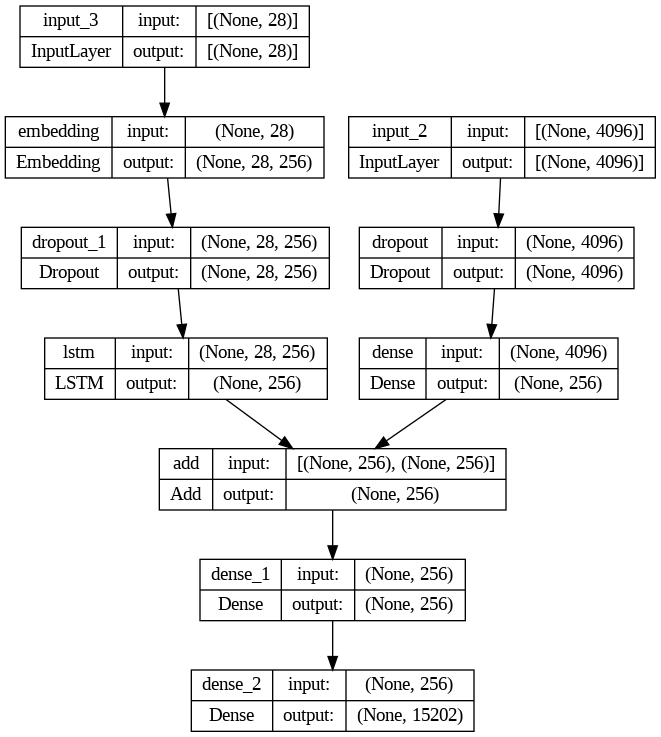

In [ ]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)

# decoder model
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [ ]:
epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 [==============================] - 71s 311ms/step - loss: 1.8054


In [ ]:
# save the model
model.save('./best_model.h5')

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
          return word
    return None

In [ ]:
from keras.models import load_model

model_path = "best_model.h5"  # Replace with your actual model file name
model = load_model(model_path)


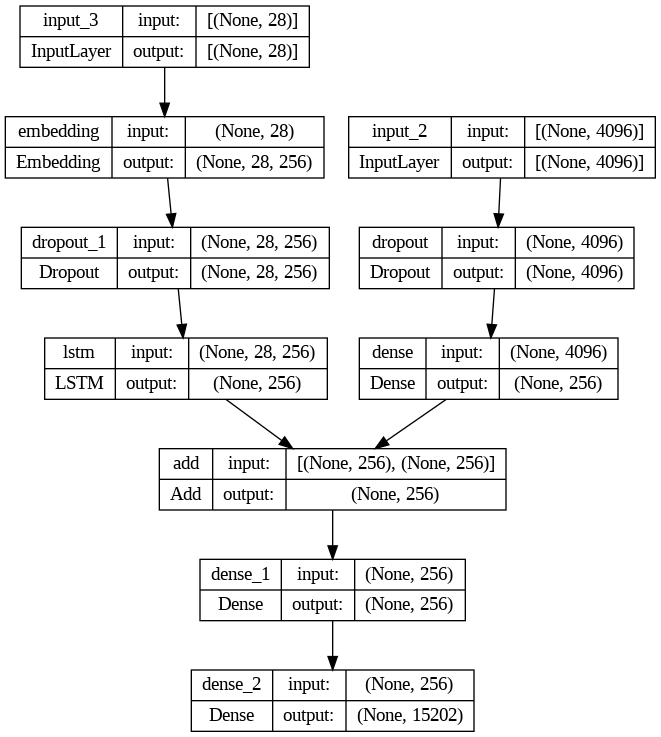

In [ ]:
plot_model(model, show_shapes=True)


In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
       # sequence = [tokenizer.texts_to_sequences([word])[0][0] for word in in_text.split()]
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        #print(sequence)
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word is None or word == 'endseq':
            break
    return in_text

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    # calcuate BLEU score
    print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BLEU-1: 0.727273
BLEU-2: 0.467099
BLEU-1: 0.684211
BLEU-2: 0.491412
BLEU-1: 0.500000
BLEU-2: 0.321634
BLEU-1: 0.450000
BLEU-2: 0.273861
BLEU-1: 0.460000
BLEU-2: 0.267499
BLEU-1: 0.442623
BLEU-2: 0.253735
BLEU-1: 0.430556
BLEU-2: 0.244163
BLEU-1: 0.450000
BLEU-2: 0.262202
BLEU-1: 0.408602
BLEU-2: 0.231317
BLEU-1: 0.411765
BLEU-2: 0.231751
BLEU-1: 0.422018
BLEU-2: 0.227323
BLEU-1: 0.410256
BLEU-2: 0.216533
BLEU-1: 0.428571
BLEU-2: 0.230429
BLEU-1: 0.421053
BLEU-2: 0.222566
BLEU-1: 0.408451
BLEU-2: 0.212193
BLEU-1: 0.400000
BLEU-2: 0.204429
BLEU-1: 0.420382
BLEU-2: 0.219189
BLEU-1: 0.433735
BLEU-2: 0.242101
BLEU-1: 0.420455
BLEU-2: 0.231433
BLEU-1: 0.427027
BLEU-2: 0.238615
BLEU-1: 0.416244
BLEU-2: 0.233228
BLEU-1: 0.427885
BLEU-2: 0.234970
BLEU-1: 0.439815
BLEU-2: 0.248049
BLEU-1: 0.455752
BLEU-2: 0.268698
BLEU-1: 0.464135
BLEU-2: 0.284613
BLEU-1: 0.469136
BLEU-2: 0.282827
BLEU-1: 0.466926
BLEU-2: 0.281379
BLEU-1: 0.458647
BLEU-2: 0.274147
BLEU-1: 0.459854
BLEU-2: 0.277408
BLEU-1: 0.4609

In [ ]:
from PIL import Image

import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    directory = os.path.join('ficker8k_images/ficker8k_images')
    img_path = directory + '/' + image_name
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length=28)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq कालो कुकुर दाग भएको कुकुर लडिरहेका छन् endseq
startseq एउटा कालो कुकुर तीन रङ्गको कुकुर सडकमा एकअर्कासँग खेल्दै। endseq
startseq एउटा कालो कुकुर खैरो दाग भएको सेतो कुकुर सडकमा एकअर्कालाई हेरिरहेका छन्। endseq
startseq सडकमा एकअर्कालाई हेर्दै विभिन्न जातका दुई कुकुरहरू। endseq
startseq फुटपाथमा दुईवटा कुकुरहरू एकअर्का तर्फ सर्दैछन्। endseq
--------------------Predicted--------------------
startseq दुईवटा कुकुर मैदानमा खेलिरहेका छन्। endseq


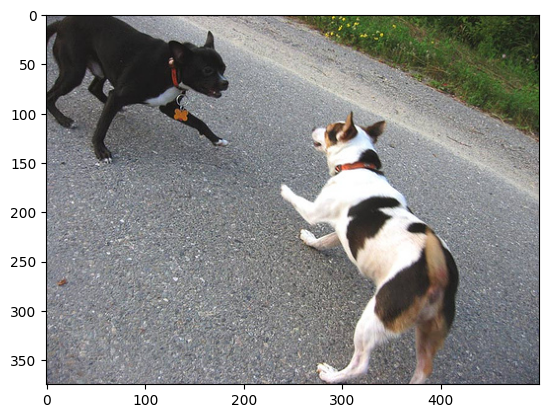

In [ ]:
generate_caption("1001773457_577c3a7d70.jpg")

---------------------Actual---------------------
startseq रंगले ढाकेकी एउटी सानी केटी कचौरामा हात लिएर रंगिएको इन्द्रेणीको अगाडि बसिरहेकी छिन्। endseq
startseq एउटी सानी केटी एउटा ठूलो चित्रित इन्द्रेणीको अगाडि बसिरहेकी छिन्। endseq
startseq घाँसमा एउटी सानी केटी इन्द्रेणी भएको सेतो क्यानभासको अगाडि औंलाको पेन्टसँग खेल्छिन्। endseq
startseq त्यहाँ इंद्रधनुष चित्रकारीको अगाडि सुँगुर बोकेकी एउटी केटी बसेकी छिन्। endseq
startseq बाहिर घाँसमा पेन्टिङ गर्दै पिगटेलसहित युवती। endseq
--------------------Predicted--------------------
startseq एउटी सानी केटी काठको पात दिनमा औंलाको पेन्टसँग खेल्छिन्। endseq


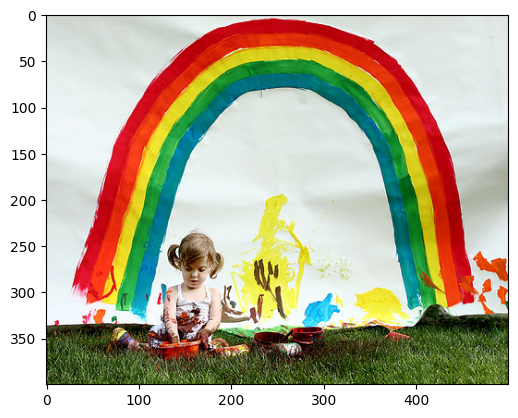

In [ ]:
generate_caption("1002674143_1b742ab4b8.jpg")